<a href="https://colab.research.google.com/github/AngXiao01/shared/blob/main/OR_TSP_DP_chen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define the dataset

In [211]:
import random
import math

# Define problem size
num_cities = 10

# Define city information
cities = []
for i in range(num_cities):
    x = round(random.uniform(0, 100),2)  # x-coordinate
    y = round(random.uniform(0, 100),2)  # y-coordinate
    cities.append((x, y))

# Define distance matrix
dist_matrix = []
for i in range(num_cities):
    row = []
    for j in range(num_cities):
        if i == j:
            row.append(0)
        else:
            dist = round(math.sqrt((cities[i][0] - cities[j][0])**2 + (cities[i][1] - cities[j][1])**2),2)
            row.append(dist)
    dist_matrix.append(row)

# Define solution format
distance = 0 # distance of tour
tour = []  # list of visited cities


In [212]:
cities

[(12.72, 65.9),
 (4.26, 99.35),
 (84.31, 8.78),
 (6.65, 85.73),
 (61.24, 79.51),
 (40.02, 9.96),
 (63.8, 33.29),
 (78.49, 54.53),
 (25.29, 3.17),
 (9.97, 29.69)]

In [213]:
dist_matrix

[[0, 34.5, 91.59, 20.74, 50.39, 62.25, 60.6, 66.75, 63.98, 36.31],
 [34.5, 0, 120.88, 13.83, 60.34, 96.28, 88.93, 86.71, 98.45, 69.89],
 [91.59, 120.88, 0, 109.33, 74.4, 44.31, 31.96, 46.12, 59.29, 77.22],
 [20.74, 13.83, 109.33, 0, 54.94, 82.79, 77.56, 78.32, 84.64, 56.14],
 [50.39, 60.34, 74.4, 54.94, 0, 72.72, 46.29, 30.36, 84.38, 71.49],
 [62.25, 96.28, 44.31, 82.79, 72.72, 0, 33.31, 58.88, 16.22, 35.95],
 [60.6, 88.93, 31.96, 77.56, 46.29, 33.31, 0, 25.83, 48.89, 53.95],
 [66.75, 86.71, 46.12, 78.32, 30.36, 58.88, 25.83, 0, 73.95, 72.88],
 [63.98, 98.45, 59.29, 84.64, 84.38, 16.22, 48.89, 73.95, 0, 30.63],
 [36.31, 69.89, 77.22, 56.14, 71.49, 35.95, 53.95, 72.88, 30.63, 0]]

# Dynamic Programming

In [214]:
import math

def tsp(coords, dist_matrix):
    n = len(coords)
    memo = {} # cache for calculated results
    all_points_set = set(range(n)) # set of all cities
    # recursive function
    def helper(curr_point, remaining_points_set, tour):
        # if result is already cached, return it
        if (curr_point, tuple(remaining_points_set)) in memo:
            return memo[(curr_point, tuple(remaining_points_set))]
        # if no other city left, return distance from current city to start
        if not remaining_points_set:
            return dist_matrix[curr_point][0], tour + [0]
        # initialize minimum distance as infinity
        min_distance = math.inf
        # traverse through remaining cities
        for next_point in remaining_points_set:
            # calculate distance from current city to next city
            distance = dist_matrix[curr_point][next_point]
            # recursively calculate shortest distance from next city to start
            remaining_points = remaining_points_set - {next_point}
            distance, new_tour = helper(next_point, remaining_points, tour + [next_point])
            distance += dist_matrix[curr_point][next_point]
            # update minimum distance
            if distance < min_distance:
                min_distance = distance
                best_tour = new_tour
        # cache the result and return
        memo[(curr_point, tuple(remaining_points_set))] = (min_distance, best_tour)
        return min_distance, best_tour
    # call recursive function, starting from the first city
    remaining_points = all_points_set - {0}
    tour = [0]
    distance, tour = helper(0, remaining_points, tour)
    return distance, tour


In [215]:
set(range(10))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [216]:
distance, tour = tsp(cities, dist_matrix)
print("The tour of city is {}".format(tour))
print("The distance of the tous is {:.2f}".format(distance))

The tour of city is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
The distance of the tous is 310.53


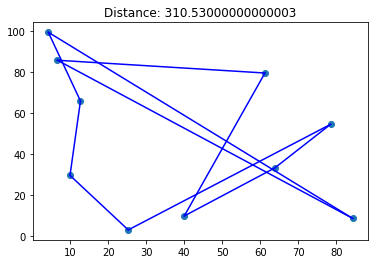

In [217]:
import matplotlib.pyplot as plt

# Plot the cities
x = [city[0] for city in cities]
y = [city[1] for city in cities]
plt.scatter(x, y)

# Plot the tour
for i in range(len(tour)-1):
    city1 = tour[i]
    city2 = tour[i+1]
    plt.plot([cities[city1][0], cities[city2][0]], [cities[city1][1], cities[city2][1]], 'b')

# Plot the edge from last city to first city
city1 = tour[-1]
city2 = tour[0]
plt.plot([cities[city1][0], cities[city2][0]], [cities[city1][1], cities[city2][1]], 'b')

# Add distance to plot
plt.title(f"Distance: {distance}")
plt.show()


In [218]:
from typing import List, Tuple

def savings_algorithm(depot: int, customers: List[int], distance_matrix: List[List[int]]) -> List[List[int]]:
    # 初始化每个客户都有一辆车从仓库出发，到达客户，然后返回仓库
    routes = [[depot, customer, depot] for customer in customers]
    # 计算所有可能的节省值
    savings = []
    for i in customers:
        for j in customers:
            if i != j:
                savings.append((i, j, distance_matrix[depot][i] + distance_matrix[depot][j] - distance_matrix[i][j]))
    # 按节省值从大到小排序
    savings.sort(key=lambda x: x[2], reverse=True)
    # 合并路线
    for i, j, _ in savings:
        route_i = next((route for route in routes if i in route), None)
        route_j = next((route for route in routes if j in route), None)
        # 如果两个客户不在同一条路线上，且 i 是其所在路线的最后一个客户，j 是其所在路线的第一个客户
        if route_i != route_j and route_i[-2] == i and route_j[1] == j:
            # 合并两条路线
            route_i.pop()
            route_i.extend(route_j)
            routes.remove(route_j)
    return routes

# 示例
depot = 0
customers = [1, 2, 3, 4]
distance_matrix = [
    [0, 10, 15, 20, 10],
    [10, 0, 35, 25, 30],
    [15, 35, 0, 30, 5],
    [20, 25, 30, 0, 15],
    [10, 30, 5, 15, 0]
]
routes = savings_algorithm(depot, customers, distance_matrix)
print(routes)

[[0, 2, 0, 4, 0, 3, 0, 1, 0]]


In [219]:
from typing import List, Tuple

def savings_algorithm(depot: int, customers: List[int], distance_matrix: List[List[int]]) -> List[List[int]]:
    routes = [[depot, customer, depot] for customer in customers]
    savings = []
    for i in customers:
        for j in customers:
            if i != j:
                savings.append((i, j, distance_matrix[depot][i] + distance_matrix[depot][j] - distance_matrix[i][j]))
    savings.sort(key=lambda x: x[2], reverse=True)
    for i, j, _ in savings:
        route_i = next((route for route in routes if i in route), None)
        route_j = next((route for route in routes if j in route), None)
        if route_i != route_j and route_i[-2] == i and route_j[1] == j:
            route_i.pop()
            route_i.extend(route_j)
            routes.remove(route_j)
    return routes

# Example
depot = 0
customers = [1, 2, 3, 4]
distance_matrix = [
    [0, 10, 15, 20, 10],
    [10, 0, 35, 25, 30],
    [15, 35, 0, 30, 5],
    [20, 25, 30, 0, 15],
    [10, 30, 5, 15, 0]
]
routes = savings_algorithm(depot, customers, distance_matrix)
print(routes)


[[0, 2, 0, 4, 0, 3, 0, 1, 0]]
